In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from tqdm.auto import tqdm

## Dataset

The famous Numenta Anomaly Benchmark (NAB) dataset. It provides artifical timeseries data containing labeled anomalous periods of behavior. Data are ordered, timestamped, single-valued metrics.

In [4]:
from pathlib import Path

DATA_DIR = Path("../data/KPI-Anomaly-Detection/Preliminary_dataset")

In [5]:
ls {DATA_DIR}

test.csv       train.csv      train.parquet


In [6]:
df = pd.read_csv(DATA_DIR / "train.csv", index_col="timestamp")
df = df.sort_index()
df = df[df["KPI ID"] == "02e99bd4f6cfb33f"].copy()
df["time"] = df.index - df.index[0]

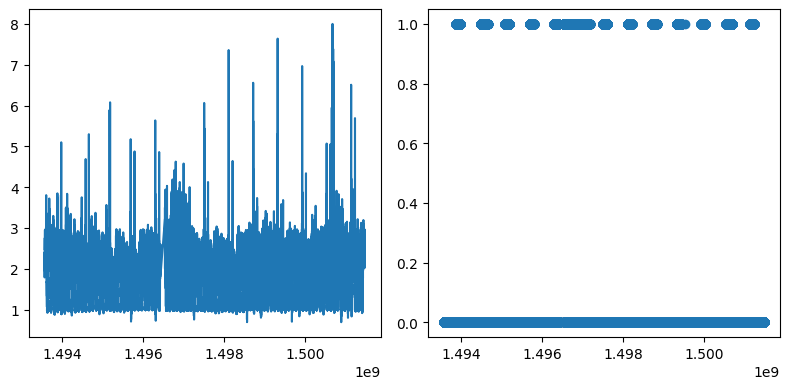

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(df.value)
plt.subplot(1, 2, 2)
plt.scatter(df.index, df.label)
plt.tight_layout();

don't even have to process...

## save processed

In [15]:
df = pd.read_csv(DATA_DIR / "train.csv", index_col="timestamp")
df = df.sort_index()
df.rename(columns={'label': 'target'}, inplace=True)
df.to_parquet(DATA_DIR / "train.parquet")

# Plots

In [16]:
df = pd.read_parquet(DATA_DIR / "train.parquet")

In [17]:
df.head()

,value,target,KPI ID
timestamp,,,
1467302400,0.197575,0,07927a9a18fa19ae
1467302700,0.149877,0,07927a9a18fa19ae
1467303000,0.078893,0,07927a9a18fa19ae
1467303300,0.012004,0,07927a9a18fa19ae
1467303600,-0.022222,0,07927a9a18fa19ae


In [18]:
df.tail()

,value,target,KPI ID
timestamp,,,
1502446560,1672.0,0,40e25005ff8992bd
1502446620,1673.0,0,40e25005ff8992bd
1502446680,1668.0,0,40e25005ff8992bd
1502446740,1698.0,0,40e25005ff8992bd
1502446800,1670.0,0,40e25005ff8992bd


In [19]:
df = df[df["KPI ID"] == "02e99bd4f6cfb33f"].copy()
df["time"] = df.index - df.index[0]
g = df
g.reset_index(inplace=True)

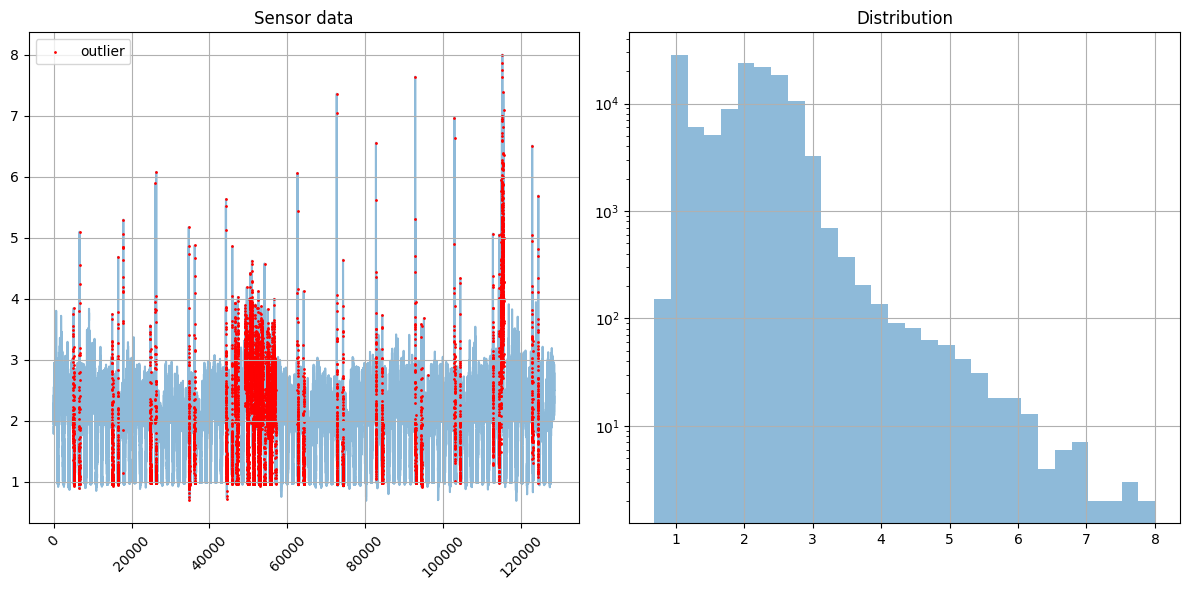

In [20]:
x = g["value"].to_numpy()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, zorder=0, alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel("")
plt.xlabel("")
plt.title("Sensor data")
# plot outliers
t = g.query("target==1")
plt.scatter(t.index, t.value, color="red", label="outlier", zorder=1, s=1)
plt.legend()
plt.grid(visible=True)
plt.subplot(1, 2, 2)
plt.hist(x, bins=30, alpha=0.5)
plt.yscale("log")
plt.title("Distribution")
plt.grid(visible=True)

plt.tight_layout()
plt.plot()
plt.savefig(f"../tex/Figures/KPIAIOps_example.png")